In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error , mean_absolute_error
import plotly.graph_objects as go
from pandas_datareader import data
import math
%matplotlib inline

In [2]:
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^BVSP', 'yahoo', start_date, end_date)

In [3]:
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0
...,...,...,...,...,...,...
2016-12-23,58143.0,57255.0,57255.0,57937.0,2155400.0,57937.0
2016-12-26,58781.0,57941.0,57941.0,58620.0,680200.0,58620.0
2016-12-27,59068.0,58402.0,58627.0,58697.0,1624700.0,58697.0


In [4]:
panel_data['rentabilidade'] = panel_data['Close'] /  panel_data['Close'].shift() * 100 - 100

In [5]:
panel_data


,High,Low,Open,Close,Volume,Adj Close,rentabilidade
Date,,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0,NaN
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0,0.278392
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0,0.696185
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0,-0.393050
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0,-0.266852
...,...,...,...,...,...,...,...
2016-12-23,58143.0,57255.0,57255.0,57937.0,2155400.0,57937.0,1.191162
2016-12-26,58781.0,57941.0,57941.0,58620.0,680200.0,58620.0,1.178867
2016-12-27,59068.0,58402.0,58627.0,58697.0,1624700.0,58697.0,0.131354


In [6]:
panel_data['mv_7'] = panel_data['Close'].rolling(7).mean()
panel_data['mv_21'] = panel_data['Close'].rolling(21).mean()
panel_data['mv_50'] = panel_data['Close'].rolling(50).mean()
panel_data['mv_200'] = panel_data['Close'].rolling(200).mean()

In [7]:
panel_data

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200
Date,,,,,,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0,NaN,NaN,NaN,NaN,NaN
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0,0.278392,NaN,NaN,NaN,NaN
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0,0.696185,NaN,NaN,NaN,NaN
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0,-0.393050,NaN,NaN,NaN,NaN
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0,-0.266852,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,58143.0,57255.0,57255.0,57937.0,2155400.0,57937.0,1.191162,57759.714286,59601.523810,61255.28,55819.090
2016-12-26,58781.0,57941.0,57941.0,58620.0,680200.0,58620.0,1.178867,57791.714286,59461.571429,61205.30,55864.335
2016-12-27,59068.0,58402.0,58627.0,58697.0,1624700.0,58697.0,0.131354,57835.714286,59263.571429,61143.90,55909.625


In [8]:
panel_data['rentabilidade']

Date
2010-01-04         NaN
2010-01-05    0.278392
2010-01-06    0.696185
2010-01-07   -0.393050
2010-01-08   -0.266852
                ...   
2016-12-23    1.191162
2016-12-26    1.178867
2016-12-27    0.131354
2016-12-28    1.848476
2016-12-29    0.744371
Name: rentabilidade, Length: 1731, dtype: float64

<AxesSubplot:xlabel='Date'>

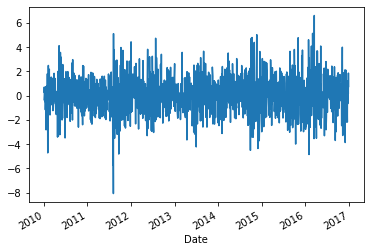

In [9]:
panel_data['rentabilidade'].plot()

In [10]:
panel_data[panel_data['mv_7'] > panel_data['mv_200']]

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200
Date,,,,,,,,,,,
2010-10-21,70958.0,68952.0,70406.0,69652.0,2587800.0,69652.0,-1.069526,70979.142857,70142.000000,68058.50,66721.515
2010-10-22,70312.0,68847.0,69658.0,69530.0,2421600.0,69530.0,-0.175156,70672.714286,70199.380952,68133.30,66718.940
2010-10-25,70231.0,69451.0,69536.0,69580.0,3836000.0,69580.0,0.071911,70371.000000,70236.809524,68205.58,66715.640
2010-10-26,70834.0,69055.0,69582.0,70740.0,2576800.0,70740.0,1.667146,70215.285714,70357.952381,68295.10,66715.695
2010-10-27,70844.0,70059.0,70735.0,70569.0,2202600.0,70569.0,-0.241730,70048.571429,70441.428571,68372.44,66716.285
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,58143.0,57255.0,57255.0,57937.0,2155400.0,57937.0,1.191162,57759.714286,59601.523810,61255.28,55819.090
2016-12-26,58781.0,57941.0,57941.0,58620.0,680200.0,58620.0,1.178867,57791.714286,59461.571429,61205.30,55864.335
2016-12-27,59068.0,58402.0,58627.0,58697.0,1624700.0,58697.0,0.131354,57835.714286,59263.571429,61143.90,55909.625


In [11]:
filter_data = panel_data['mv_7'] > panel_data['mv_200']
import datetime as dt

In [12]:
def extracao(df):
    df.reset_index(inplace=True)
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    

In [13]:
extracao(panel_data)
panel_data.set_index(['Date'], inplace=True)

In [14]:
panel_data

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200,year,month,day
Date,,,,,,,,,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0,NaN,NaN,NaN,NaN,NaN,2010,1,4
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0,0.278392,NaN,NaN,NaN,NaN,2010,1,5
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0,0.696185,NaN,NaN,NaN,NaN,2010,1,6
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0,-0.393050,NaN,NaN,NaN,NaN,2010,1,7
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0,-0.266852,NaN,NaN,NaN,NaN,2010,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,58143.0,57255.0,57255.0,57937.0,2155400.0,57937.0,1.191162,57759.714286,59601.523810,61255.28,55819.090,2016,12,23
2016-12-26,58781.0,57941.0,57941.0,58620.0,680200.0,58620.0,1.178867,57791.714286,59461.571429,61205.30,55864.335,2016,12,26
2016-12-27,59068.0,58402.0,58627.0,58697.0,1624700.0,58697.0,0.131354,57835.714286,59263.571429,61143.90,55909.625,2016,12,27


<AxesSubplot:xlabel='day'>

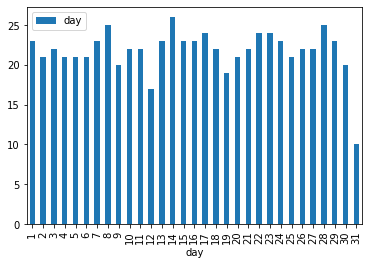

In [22]:
panel_data[filter_data].groupby('day').agg({'day':'count'}).plot(kind='bar')

In [16]:
panel_data[filter_data].groupby('month').size()

month
1     54
2     37
3     46
4     81
5     71
6     61
7     56
8     44
9     57
10    58
11    56
12    54
dtype: int64

<AxesSubplot:xlabel='month'>

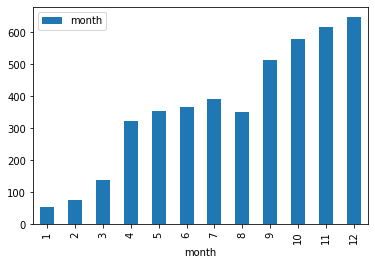

In [17]:
panel_data[filter_data].groupby('month').agg({'month':'sum'}).plot(kind='bar')

<AxesSubplot:xlabel='month'>

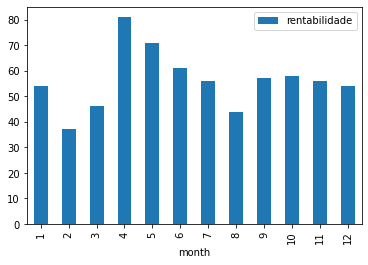

In [18]:
panel_data[filter_data].groupby('month').agg({'rentabilidade':'count'}).plot(kind='bar')

<AxesSubplot:xlabel='month'>

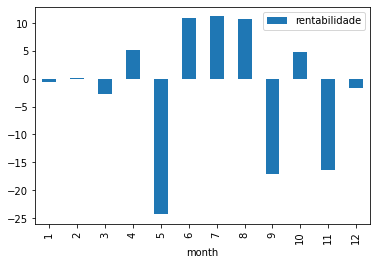

In [19]:
panel_data[filter_data].groupby('month').agg({'rentabilidade':'sum'}).plot(kind='bar')

<AxesSubplot:xlabel='year'>

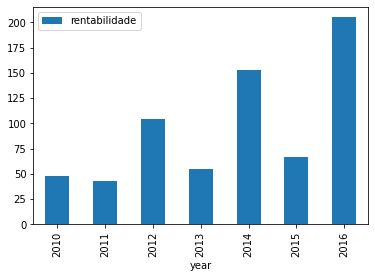

In [20]:
panel_data[filter_data].groupby('year').agg({'rentabilidade':'count'}).plot(kind='bar')